# **Hospital Length of Stay Optimization:Data Analysis and Visualization**
 SPARCS De-Identified Dataset - Albany Medical Center Analysis Period: 2021 | Sample Size: 7,774 patients*


**Import Libraries and Filter for Albany Medical center**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import pearsonr, spearmanr, kruskal
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#Load Dataset
df = pd.read_csv("/content/IP_DeID_21_Apr2024_final - dwnld 12-17-24.csv")


/tmp/ipython-input-1617119674.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/IP_DeID_21_Apr2024_final - dwnld 12-17-24.csv")


In [ ]:
#View First Few Rows of Dataset
df.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Extreme,Medical,Medicare,Medicaid,NaN,NaN,Y,"320,922.43","60,241.34"
1,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,White,Not Span/Hispanic,...,Moderate,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,"61,665.22","9,180.69"
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Other Race,Spanish/Hispanic,...,Minor,Minor,Surgical,Medicaid,NaN,NaN,NaN,N,"42,705.34","11,366.50"
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Major,Medical,Medicare,Medicaid,NaN,NaN,Y,"72,700.17","12,111.75"
4,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,Black/African American,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicare,Medicaid,NaN,NaN,Y,"55,562.51","8,339.72"


In [ ]:
# filter for Albany Hospital 'operating certificate Number' equals 0101000
df_NYHospital_filtered = df[df['Operating Certificate Number'] == 101000]



In [ ]:
# Print first 5 rows to check the result
print(df_NYHospital_filtered.head())


Empty DataFrame
Columns: [Hospital Service Area, Hospital County, Operating Certificate Number, Permanent Facility Id, Facility Name, Age Group, Zip Code - 3 digits, Gender, Race, Ethnicity, Length of Stay, Type of Admission, Patient Disposition, Discharge Year, CCSR Diagnosis Code, CCSR Diagnosis Description, CCSR Procedure Code, CCSR Procedure Description, APR DRG Code, APR DRG Description, APR MDC Code, APR MDC Description, APR Severity of Illness Code, APR Severity of Illness Description, APR Risk of Mortality, APR Medical Surgical Description, Payment Typology 1, Payment Typology 2, Payment Typology 3, Birth Weight, Emergency Department Indicator, Total Charges, Total Costs]
Index: []

[0 rows x 33 columns]


In [ ]:
# Save New filtered dattable as CSV file
df_NYHospital_filtered.to_csv('NYHospital_filtered_dataset.csv', index=False)

# Albany New York Patient Dataset

**Load and Prep Dataset filtered for Albany Medical Center**

In [ ]:
#Load Dataset
df = pd.read_csv("/content/NYHospital_filtered_dataset.csv")
df.columns = [col.strip().replace(" ", "_") for col in df.columns]

In [ ]:
#View Datatypes
print(df.dtypes)
df.dtypes.value_counts()

Hospital_Service_Area                   object
Hospital_County                         object
Operating_Certificate_Number           float64
Permanent_Facility_Id                  float64
Facility_Name                           object
Age_Group                               object
Zip_Code_-_3_digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length_of_Stay                          object
Type_of_Admission                       object
Patient_Disposition                     object
Discharge_Year                           int64
CCSR_Diagnosis_Code                     object
CCSR_Diagnosis_Description              object
CCSR_Procedure_Code                     object
CCSR_Procedure_Description              object
APR_DRG_Code                             int64
APR_DRG_Description                     object
APR_MDC_Code                             int64
APR_MDC_Descr

,count
object,26
float64,4
int64,3


In [ ]:
# Find and delete duplicates
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicates found:", duplicate_rows_df.shape[0])

df.drop_duplicates(inplace=True)
print("Shape after dropping duplicates:", df.shape)

# Check if all duplicates were removed:
print("Duplicates remaining:", df[df.duplicated()].shape[0])

Number of duplicates found: 1
Shape after dropping duplicates: (7774, 33)
Duplicates remaining: 0


In [ ]:
# Convert object to numeric


#strip space and replace empty string with NaN
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df = df.replace('', np.nan)


#Remove comas or currency symbols
df = df.replace({',': '', r'\$': ''}, regex=True)

#Convert to numeric
numeric_columns = ['Length_of_Stay', 'Total_Charges', 'Total_Costs']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')



In [ ]:
# View datatype and how null many values
print(df[numeric_columns].dtypes)
print(df[numeric_columns].isna().sum())  # will drop later for regression model

Length_of_Stay    float64
Total_Charges     float64
Total_Costs       float64
dtype: object
Length_of_Stay    2
Total_Charges     0
Total_Costs       0
dtype: int64


# **Analysis**

# **Summary**
 This analysis identifies clear opportunities to reduce hospital length of stay (LOS) through targeted, evidence-based interventions. The study population shows an average LOS of 6.3 days, which accounts for $140 million in total patient costs. Performance metrics reveal significant differences based on patient characteristics. Urgent admissions average 7.1 days, while elective procedures average 4.9 days. Patients aged 50 and older experience an LOS exceeding 7 days, compared to 4 days for those aged 18 to 29. These disparities highlight possible ways to improve operations, redesign clinical processes, and cut costs.

#**Overview of Admissions and LOS**



In [ ]:
#Admission Count
admission_count = df.shape[0]
print("Total Admission Count:", admission_count)

Total Admission Count: 7774


In [ ]:
# Average Length of Stay
average_length_of_stay = df['Length_of_Stay'].mean()
print("Average Length of Stay:", round(average_length_of_stay, 2))

Average Length of Stay: 6.32


In [ ]:
#LOS stats

# Total Length of Stay days
average_length_of_stay = df['Length_of_Stay'].sum()
print("Total Length of Stay:", round (average_length_of_stay))

#median length of stay
median_los = statistics.median(df['Length_of_Stay'])
print("Median length of stay:", round(median_los, 2))

# Calculate the 10th percentile
percentile_10th = np.nanpercentile(df['Length_of_Stay'], 10)
print("The 10th percentile:", round(percentile_10th, 2))

# Calculate the 90th percentile
percentile_90th = np.nanpercentile(df['Length_of_Stay'], 90)
print("The 90th percentile is:", round(percentile_90th, 2))

Total Length of Stay: 49113
Median length of stay: 4.0
The 10th percentile: 1.0
The 90th percentile is: 14.0


In [ ]:
# Sum and Average Total Cost

#Sum
total_charges = df['Total_Costs'].sum()
print("Total Costs:", round(total_charges, 2))

#average
Average_Total_Costs = df['Total_Costs'].mean()
print("Average Total Costs Per Patient:", round(Average_Total_Costs, 2))

#Total cost per day df =
df['Cost_Per_Day'] = df['Total_Costs'] /df['Length_of_Stay']
Avg_Cost_Per_Day = df['Cost_Per_Day'].mean()
print("Average Costs Per Day:", round(Avg_Cost_Per_Day, 2))

Total Costs: 140658756.97
Average Total Costs Per Patient: 18098.14
Average Costs Per Day: 3560.18


The data encompassed a total sample size of 7,774 patients, who collectively accounted for 49,113 hospital days, resulting in an average length of stay of 6.3 days per patient. The aggregate cost associated with these hospitalizations reached \$140.7 million, an average total charge of $18,098 per patient.

# ***Demographic and Payment Analysis***











*Gender*

  Gender  Total_LOS  Average_LOS  Patient_Count Patient_Percentage
0      F    22605.0     5.902089           3830             49.28%
1      M    26508.0     6.724505           3942             50.72%


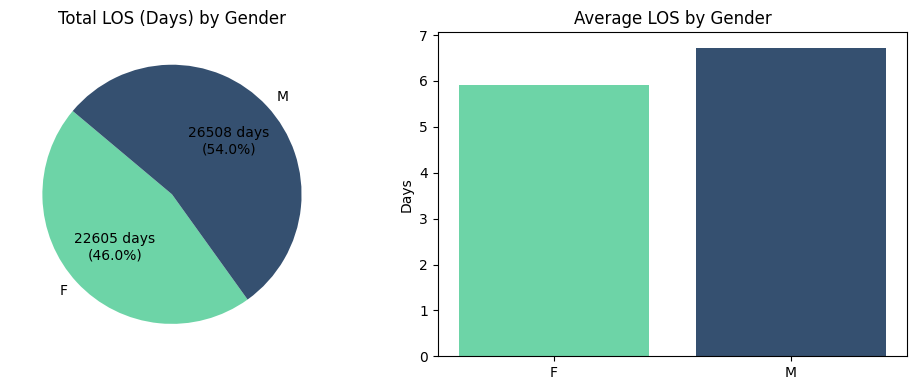

In [ ]:
#LOS by Gender

#Table Summary
gender_stats = df.groupby('Gender')['Length_of_Stay'].agg(
    Total_LOS='sum',
    Average_LOS='mean',
    Patient_Count='count'
).reset_index()

# Percentage
total_patients = gender_stats['Patient_Count'].sum()
gender_stats['Patient_Percentage'] = (gender_stats['Patient_Count'] / total_patients * 100 ).apply(lambda x: f"{x:.2f}%")

print(gender_stats)

# Graph
total_los = gender_stats['Total_LOS'].sum()
fig, axs = plt.subplots(1, 2, figsize=(10, 4))


# Pie Chart Total LOS days
axs[0].pie(
    gender_stats['Total_LOS'],
    labels=gender_stats['Gender'],
    startangle=140,
    colors=['#6dd4a7', '#355070'],
    autopct=lambda p: f"{int(round(p*total_los/100))} days\n({p:.1f}%)"
)
axs[0].set_title('Total LOS (Days) by Gender')

# Bar chart Avg LOS.
axs[1].bar(
    gender_stats['Gender'],
    gender_stats['Average_LOS'],
    color=['#6dd4a7', '#355070']
)
axs[1].set_title('Average LOS by Gender')
axs[1].set_ylabel('Days')

plt.tight_layout()
plt.show()


*Race*

                     Race  Average_LOS  Patient_Count Patient_Percentage
0  Black/African American     5.988889            990             12.74%
1              Other Race     6.401639           1220             15.70%
2                   White     6.359942           5562             71.56%


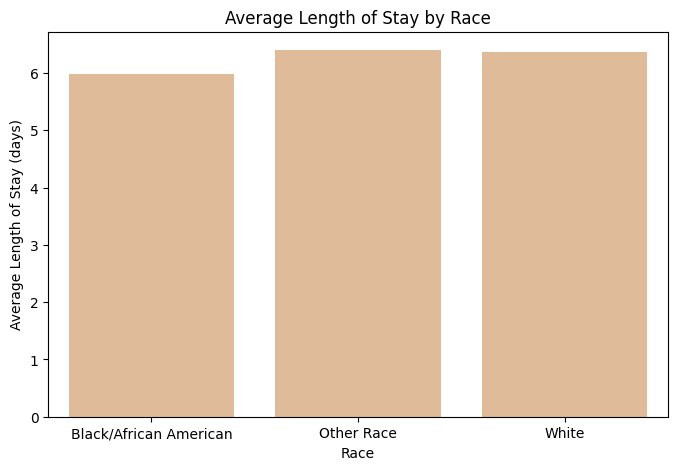

In [ ]:
# Average Length of Stay by Race  (Average Length of Stay = LOS abbrv for single line table)

race_stats = df.groupby('Race')['Length_of_Stay'].agg(
    Average_LOS='mean',
    Patient_Count='count'
).reset_index()

# Percentage
total_patients = race_stats['Patient_Count'].sum()
race_stats['Patient_Percentage'] = (race_stats['Patient_Count'] / total_patients * 100 ).apply(lambda x: f"{x:.2f}%")

print(race_stats)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(data=race_stats, x='Race', y='Average_LOS', color='#ebba8d')
plt.title('Average Length of Stay by Race')
plt.xlabel('Race')
plt.ylabel('Average Length of Stay (days)')
plt.show()

*Age*

     Age_Group  Average_Length_of_Stay  Patient_Count Patient_Percentage
0      0 to 17                5.001581           1265             16.28%
1     18 to 29                3.991643            718              9.24%
2     30 to 49                5.238893           1373             17.67%
3     50 to 69                7.129622           2353             30.28%
4  70 or Older                7.731944           2063             26.54%


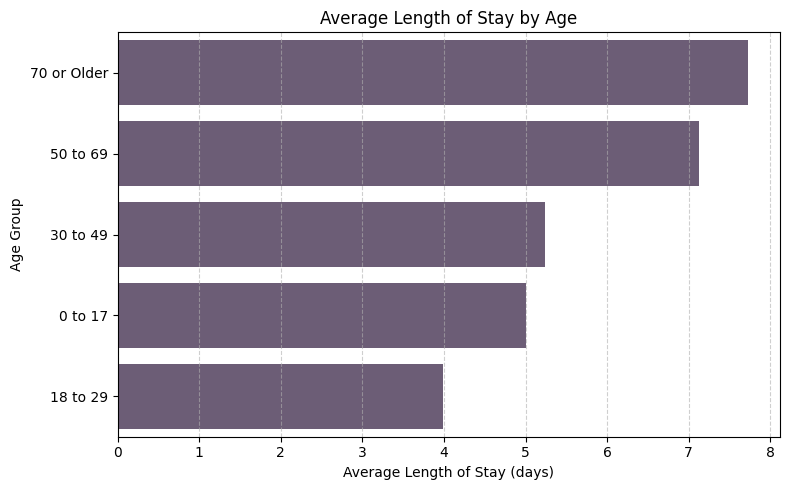

In [ ]:
# Age range and length of Stay

#Summary table
Age_stats = df.groupby('Age_Group')['Length_of_Stay'].agg(
    Average_Length_of_Stay='mean',
    Patient_Count='count'
).reset_index()

#percentage
total_patients = Age_stats['Patient_Count'].sum()
Age_stats['Patient_Percentage'] = (Age_stats['Patient_Count'] / total_patients * 100 ).apply(lambda x: f"{x:.2f}%")
print(Age_stats)

# Sort age group
Age_stats = Age_stats.sort_values('Average_Length_of_Stay', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot( data=Age_stats, x='Average_Length_of_Stay', y='Age_Group',color='#6D597A', orient='h')
plt.title('Average Length of Stay by Age')
plt.xlabel('Average Length of Stay (days)')
plt.ylabel('Age Group')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



*Insurance Utilization*



           Top 5 Insurances  Avg LOS  Patient Count Patient %
0                  Medicare      7.8           2741     36.9%
1  Managed Care Unspecified      5.1           2563     34.5%
2    Blue Cross/Blue Shield      5.8           1114     15.0%
3  Private Health Insurance      5.7            612      8.2%
4                  Medicaid      6.9            406      5.5%


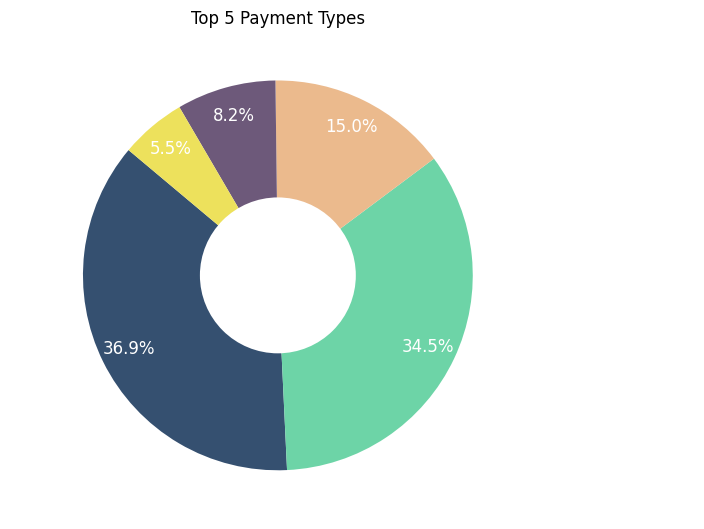

In [ ]:
# Top 5 Payment Types

# Summary Table for 5 payment types by count
top5_payments = df['Payment_Typology_1'].value_counts().head(5)

# percentages
top5_total = top5_payments.sum()
top5_percentages = (top5_payments / top5_total) * 100

# Filter the DataFrame to include only the top 5 payment types
filtered_df = df[df['Payment_Typology_1'].isin(top5_payments.index)]

# Calculate average length of stay for each payment type
avg_length_of_stay = filtered_df.groupby('Payment_Typology_1')['Length_of_Stay'].mean().round(1)

# Combine all into a summary table
payment_table = pd.DataFrame({
    'Avg LOS': avg_length_of_stay,
    'Patient Count': top5_payments,
    'Patient %': top5_percentages.round(1).astype(str) + '%'
})

# Sort by Patient Count descending
payment_table = payment_table.rename_axis('Top 5 Insurances').reset_index()
payment_table = payment_table.sort_values(by='Patient Count', ascending=False).reset_index(drop=True)

print(payment_table)
# Sort by Patient Count descending and reset index



#Donut visuallization
top5_payments = df['Payment_Typology_1'].value_counts().head(5)
labels = top5_payments.index
sizes = top5_payments.values

colors = ['#355070', '#6dd4a7', '#ebba8d', '#6D597A', '#ede15c']


plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=colors,
    textprops={'color': 'white', 'fontsize': 12}
)

# circle center
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Top 5 Payment Types')
plt.tight_layout()
plt.show()




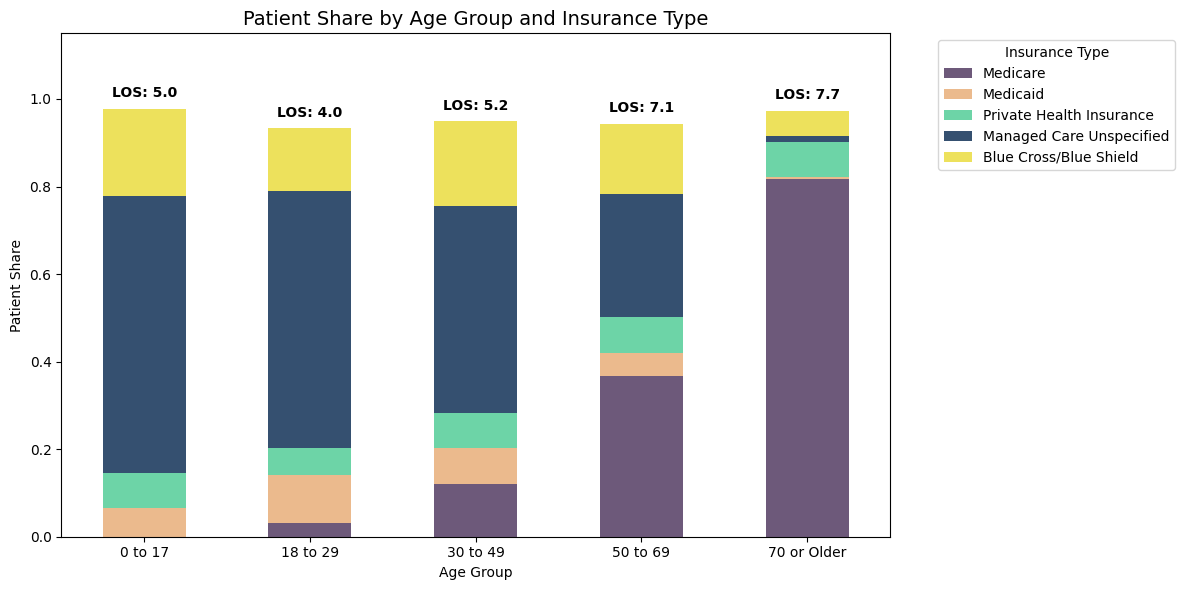

In [ ]:
# Creating stacked bar chart with patient share by age group and insurance type, using custom colors and LOS annotations

# Set colors - keeping the original color mapping for consistency
colors = {
    'Medicare': '#6D597A',
    'Medicaid': '#ebba8d',
    'Private Health Insurance': '#6dd4a7',
    'Managed Care Unspecified': '#355070',
    'Blue Cross/Blue Shield': '#ede15c'
}

# Prepare data for plotting
# Group by Age_Group and Payment_Typology_1 and count patients
age_insurance_counts = df.groupby(['Age_Group', 'Payment_Typology_1']).size().reset_index(name='count')

# Calculate patient share within each Age_Group
age_insurance_counts['patient_share'] = age_insurance_counts.groupby('Age_Group')['count'].transform(lambda x: x / x.sum())

# Pivot the data to get insurance types as columns
pivot_share = age_insurance_counts.pivot(index='Age_Group', columns='Payment_Typology_1', values='patient_share').fillna(0)

# Reindex columns to match the desired order for plotting and color mapping
# This step ensures that the columns are in the same order as defined in the 'colors' dictionary keys
# If a payment type is not in the data, it will not be included as a column.
pivot_share = pivot_share[colors.keys()].fillna(0)


# Get average LOS per age group for annotations
age_avg_los = df.groupby('Age_Group')['Length_of_Stay'].mean().round(1)

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

pivot_share.plot(kind='bar', stacked=True, ax=ax, color=[colors.get(col, 'gray') for col in pivot_share.columns])

# Add LOS annotations
# Ensure age_avg_los is aligned with the age groups in the pivoted DataFrame index
aligned_avg_los = age_avg_los.reindex(pivot_share.index)

for i, (age_group, share_row) in enumerate(pivot_share.iterrows()):
    # Position the annotation above the top of the stacked bar
    ax.text(i, share_row.sum() + 0.02, f'LOS: {aligned_avg_los.get(age_group, "N/A")}', ha='center', va='bottom', fontsize=10, fontweight='bold')


# Customize plot
ax.set_title('Patient Share by Age Group and Insurance Type', fontsize=14)
ax.set_ylabel('Patient Share')
ax.set_xlabel('Age Group')
ax.set_ylim(0, 1.15) # Adjust y-limit to make space for annotations
ax.legend(title='Insurance Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0) # Keep age group labels horizontal
plt.tight_layout()
plt.show()

**Demographics and Payment Summary**

*  Male patients exhibited a longer average(LOS) at approximately 6.7 days, compared to their female counterparts (5.9 days).
*   Patients identified as White or Other race had the longest average LOS, both around 6 days.
* The 70+ age group experienced the longest hospital stays, averaging 7.7 days, while the 18–29 age group had the shortest LOS at approximately 3.9 days.
* Medicare emerged as the most commonly used insurance provider among the patient population.


# ***Length of Stay Impact Analysis*** ***: Patient Admissions and Discharge***



**Admissions and Severity**

*Distribution of Length of Stay*

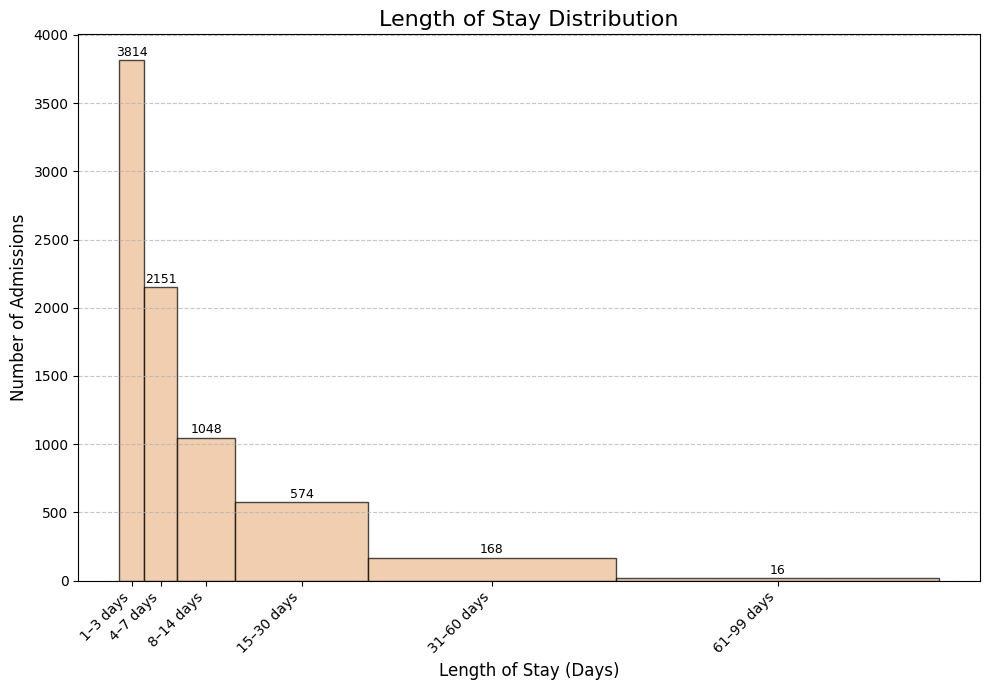


Length of Stay Summary (Admissions):
--------------------------------------------------------------------------------
Days                 | Patient Count        | Patient Percentage  
--------------------------------------------------------------------------------
1–3 days             | 3814                 |  49.06%             
4–7 days             | 2151                 |  27.67%             
8–14 days            | 1048                 |  13.48%             
15–30 days           | 574                  |  7.38%              
31–60 days           | 168                  |  2.16%              
61–99 days           | 16                   |  0.21%              


In [ ]:
# Length of Stay Distribution

# bins and labels
custom_bins = [1, 4, 8, 15, 31, 61, 100]
bin_labels = ['1–3 days', '4–7 days', '8–14 days', '15–30 days', '31–60 days', '61–99 days']

# histogram
plt.figure(figsize=(10, 7))
counts, bin_edges, patches = plt.hist(df['Length_of_Stay'], bins=custom_bins, edgecolor='black', color= '#ebba8d', alpha=0.7)

# data labels
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
for count, center in zip(counts, bin_centers):
    if count > 0:
        plt.text(center, count + 10, f'{int(count)}', ha='center', va='bottom', fontsize=9, color='black')

# axes
plt.xticks(bin_centers, bin_labels, rotation=45, ha='right')
plt.title('Length of Stay Distribution', fontsize=16)
plt.xlabel('Length of Stay (Days)', fontsize=12)
plt.ylabel('Number of Admissions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Summary Table
total_admissions = len(df['Length_of_Stay'])
print("\nLength of Stay Summary (Admissions):")
print("-" * 80)
print(f"{'Days':<20} | {'Patient Count':<20} | {'Patient Percentage':<20}")
print("-" * 80)
for label, count in zip(bin_labels, counts):
    percentage = (count / total_admissions) * 100
    formatted = f"{percentage: .2f}%"
    print(f"{label:<20} | {int(count):<20} | {formatted:<20}")




Type of Admission

  Type_of_Admission  Average_LOS  Patient_Count  Total_LOS   Total_Cost  \
0         Emergency     6.371378           5038    32099.0  87474312.76   
1            Urgent     7.117878           1018     7246.0  22916819.48   
2          Elective     4.913442            982     4825.0  18638865.70   
3           Newborn     6.942857            455     3159.0   6624659.89   
4            Trauma     6.392086            278     1777.0   6213074.17   
5     Not Available     7.000000              1        7.0     10788.09   

   Average_Cost  Average_Cost_Per_Day Patient_Percentage Cost_Percentage  
0  17362.904478           2725.141368             64.82%          61.65%  
1  22511.610491           3162.685548             13.10%          16.15%  
2  18980.514969           3862.977347             12.64%          13.14%  
3  14495.973501           2097.074989              5.85%           4.67%  
4  22349.187662           3496.383889              3.58%           4.38%  
5  10788.090000         

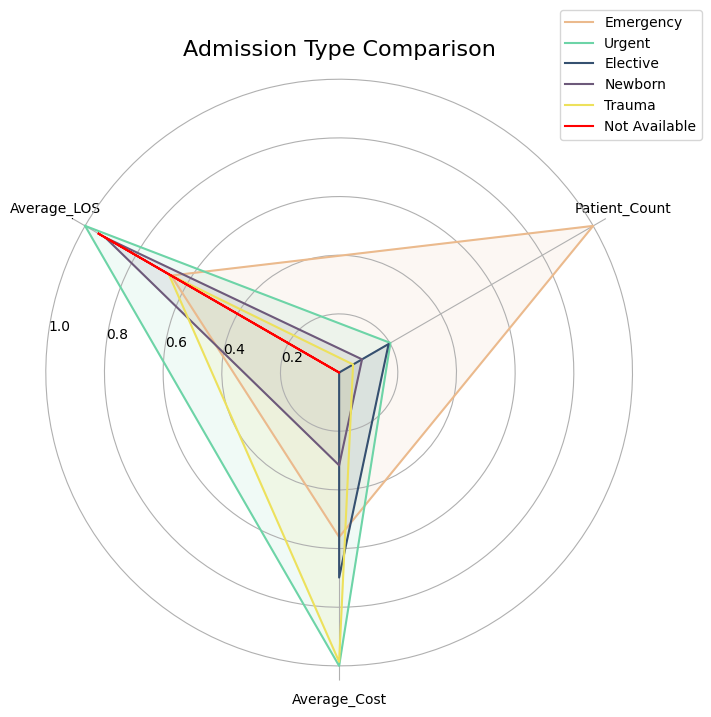

In [ ]:
# type of admission

# Summary table with cost
admission_stats = df.groupby('Type_of_Admission').agg(
    Average_LOS=('Length_of_Stay', 'mean'),
    Patient_Count=('Length_of_Stay', 'count'),
    Total_LOS=('Length_of_Stay', 'sum'),
    Total_Cost=('Total_Costs', 'sum'),
    Average_Cost=('Total_Costs', 'mean')
).reset_index()

#cost per day
admission_stats['Average_Cost_Per_Day'] = admission_stats['Total_Cost'] / admission_stats['Total_LOS']

# Percentage
total_patients = admission_stats['Patient_Count'].sum()
admission_stats['Patient_Percentage'] = (admission_stats['Patient_Count'] / total_patients * 100).apply(lambda x: f"{x:.2f}%")

total_costs = admission_stats['Total_Cost'].sum()
admission_stats['Cost_Percentage'] = (admission_stats['Total_Cost'] / total_costs * 100).apply(lambda x: f"{x:.2f}%")

# Sort by Patient Count
admission_stats = admission_stats.sort_values('Patient_Count', ascending=False).reset_index(drop=True)

print(admission_stats)


#radar chart

# Select metrics for radar chart
metrics = admission_stats[['Average_LOS', 'Average_Cost', 'Patient_Count']]
labels = admission_stats['Type_of_Admission']
colors = ['#ebba8d', '#6dd4a7', '#355070', '#6D597A', '#ede15c', 'red']

# Normalize metrics
scaler = MinMaxScaler()
normalized = scaler.fit_transform(metrics)
normalized = np.concatenate([normalized, normalized[:, [0]]], axis=1)  # close loop

# Angle setup
angles = np.linspace(0, 2 * np.pi, len(metrics.columns), endpoint=False).tolist()
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in enumerate(normalized):
    ax.plot(angles, row, label=labels[i], color=colors[i])
    ax.fill(angles, row, alpha=0.1, color=colors[i])


ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics.columns)
ax.set_theta_offset(np.pi / 1.2) #rotate the chart for labels
ax.set_title('Admission Type Comparison', fontsize=16)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

***NOTE:*** The "Not Available" admission is shown because it has a significant higher LOS compared to other admissions.



Severity of Illness Description

In [ ]:
# Length of Stay by APR Severity of Illness Description
severity_stats = df.groupby('APR_Severity_of_Illness_Description')['Length_of_Stay'].agg(
    Average_LOS='mean',
    Total_LOS='sum',
    Patient_Count='count'
).reset_index()

# Percentage
total_patients =severity_stats['Patient_Count'].sum()
severity_stats['Patient_%'] = (severity_stats['Patient_Count'] / total_patients * 100 ).apply(lambda x: f"{x:.2f}%")


print(severity_stats)

  APR_Severity_of_Illness_Description  Average_LOS  Total_LOS  Patient_Count  \
0                             Extreme    14.198300    15036.0           1059   
1                               Major     8.250395    15684.0           1901   
2                               Minor     2.685003     5174.0           1927   
3                            Moderate     4.581976    13219.0           2885   

  Patient_%  
0    13.63%  
1    24.46%  
2    24.79%  
3    37.12%  


**LOS Admission and Severity Summary **

*   Nearly half the patients (49.1%) have a LOS in the hospital between 1-3 days , indicating a high turnover and potential efficiency in patient processing for less severe medical needs.

* Emergency admission represents the largest volume(64% of all admissions) and a LOS of 6.4 days. Regarding cost, Urgent admissions present a resource management challenge, it consumes 15% of aggregate costs an average average \$22,511 per admission compared to emergency average (\$17,362).

* Extreme APR Severity cases require intensive resources having an average LOS of 14.2 days per patient. Minor severity cases demonstrate efficient care delivery with the shortest average stay (2.7 days) despite comprising 24.8% of the population






**Dispositions**

Type of Dispositions and Success Rate

In [ ]:
# LOS and Successful and Unsucessful Discharges

# Unsuccessful dispositions
unsuccessful = ['Expired', ' Left Against Medical Advice', 'Another Type Not Listed']

# Filter for successful dispositions
successful_df = df[~df['Patient_Disposition'].isin(unsuccessful)]

# Count of each category in patient disposition
discharge_counts = df['Patient_Disposition'].value_counts()

print("Discharge_Type_Counts:")
print(discharge_counts)
print("-" * 30)

#summary Table
# Check how many are successful discharges
df['Successful_Discharge'] = ~df['Patient_Disposition'].isin(unsuccessful)

success_count = df['Successful_Discharge'].sum()
total = len(df)
success_rate = success_count / total

print(f"Number of Successful Discharges: {success_count}")
print(f"Total Cases: {total}")
print(f"Success Rate: {success_rate:.2%}")

# Patient_Disposition count
disposition_stats = df.groupby('Patient_Disposition').agg(
    Average_LOS=('Length_of_Stay', 'mean'),
    Total_LOS=('Length_of_Stay', 'sum'),
    Patient_Count=('Length_of_Stay', 'count')
).reset_index()
disposition_stats=disposition_stats.sort_values(by='Average_LOS', ascending=False)

# Patient Percentage
# Percentage
total_patients =disposition_stats['Patient_Count'].sum()
disposition_stats['Patient_%'] = (disposition_stats['Patient_Count'] / total_patients * 100 ).apply(lambda x: f"{x:.2f}%")

print("\nDisposition Stats Summary:")
print(disposition_stats)

Discharge_Type_Counts:
Patient_Disposition
Home or Self Care                        5292
Home w/ Home Health Services              704
Skilled Nursing Home                      664
Expired                                   380
Inpatient Rehabilitation Facility         255
Left Against Medical Advice               132
Court/Law Enforcement                     114
Psychiatric Hospital or Unit of Hosp       69
Short-term Hospital                        67
Hospice - Home                             49
Federal Health Care Facility               13
Hospice - Medical Facility                 12
Medicare Cert Long Term Care Hospital      12
Another Type Not Listed                    11
Name: count, dtype: int64
------------------------------
Number of Successful Discharges: 7383
Total Cases: 7774
Success Rate: 94.97%

Disposition Stats Summary:
                      Patient_Disposition  Average_LOS  Total_LOS  \
0                 Another Type Not Listed    17.272727      190.0   
7            

Disposition by race

Unsuccessful Dispositions by Race (Both Perspectives):
                     Race  Total_LOS  Average_LOS  Unsuccessful_Count  \
0  Black/African American      526.0     6.575000                  80   
1                   White     3263.0     8.818919                 370   
2              Other Race      632.0     8.657534                  73   

   Total_Count Share_of_Unsuccessful Unsuccessful_Rate  
0          990                15.30%             8.08%  
1         5562                70.75%             6.65%  
2         1220                13.96%             5.98%  


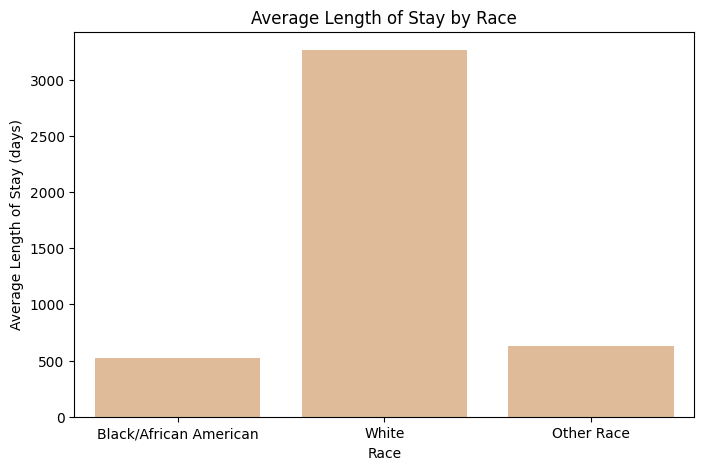

In [ ]:
# Unsuccessful dispositions
unsuccessful = ['Expired', 'Left Against Medical Advice', 'Another Type Not Listed']

# Filter unsuccessful patients
unsuccessful_df = df[df['Patient_Disposition'].isin(unsuccessful)]

# Group unsuccessful by race
unsuccessful_stats = unsuccessful_df.groupby('Race')['Length_of_Stay'].agg(
    Total_LOS='sum',
    Average_LOS='mean',
    Unsuccessful_Count='count'
).reset_index()

# Group total patients by race
race_totals = df.groupby('Race')['Length_of_Stay'].agg(
    Total_Count='count'
).reset_index()

# Merge both dataframes
race_stats = pd.merge(unsuccessful_stats, race_totals, on="Race", how="left")

# % Share of unsuccessful group (composition within unsuccessful)
total_unsuccessful_patients = unsuccessful_stats['Unsuccessful_Count'].sum()
race_stats['Share_of_Unsuccessful'] = (
    race_stats['Unsuccessful_Count'] / total_unsuccessful_patients * 100
).apply(lambda x: f"{x:.2f}%")

# % Unsuccessful rate relative to total patients of that race
race_stats['Unsuccessful_Rate'] = (
    race_stats['Unsuccessful_Count'] / race_stats['Total_Count'] * 100
).apply(lambda x: f"{x:.2f}%")

# Sort by Unsuccessful_Rate for clarity
race_stats = race_stats.sort_values(
    by='Unsuccessful_Rate', ascending=False
).reset_index(drop=True)

print("Unsuccessful Dispositions by Race (Both Perspectives):")
print(race_stats)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(data=race_stats, x='Race', y='Total_LOS', color='#ebba8d')
plt.title('Average Length of Stay by Race')
plt.xlabel('Race')
plt.ylabel('Average Length of Stay (days)')
plt.show()


* The healthcare systems has astrong effectiveness with a 84.97% rate for non-mortality dispositions. Majority of patients are discharged to their home or self-care settings, indicating successful discharge planning.

* White patients account for 70% of the patient population and have the highest aggregate LOS (3,263 total days) and a 6.7% unsuccessful disposition rate. Black patients,having the lowest total LOS (526 days), experience the highest unsuccessful disposition rate at 8.1%, indicating potential disparities in care quality or access to post-acute services. Patients classified as "Other" race has the most favorable outcomes with the lowest unsuccessful disposition count and rate (approximately 14 patients, 7% rate).


# **Diagnosis/Classification**

In [ ]:
# Compute total LOS (sum)
total_los = df.groupby(['APR_MDC_Code', 'APR_MDC_Description'])['Length_of_Stay'].sum()

# Compute average LOS (mean)
avg_los = df.groupby(['APR_MDC_Code', 'APR_MDC_Description'])['Length_of_Stay'].mean()

# Create DataFrames
total_los_df = total_los.reset_index().rename(columns={'Length_of_Stay': 'Total_LOS'})
avg_los_df = avg_los.reset_index().rename(columns={'Length_of_Stay': 'Average_LOS'})

# Merge total and average LOS
combined_los_df = total_los_df.merge(avg_los_df, on=['APR_MDC_Code', 'APR_MDC_Description'])

# Get patient counts
patient_counts = df.groupby(['APR_MDC_Code', 'APR_MDC_Description'])['Length_of_Stay'].count().reset_index().rename(columns={'Length_of_Stay': 'Patient_Count'})

# Merge patient counts
combined_los_df = combined_los_df.merge(patient_counts, on=['APR_MDC_Code', 'APR_MDC_Description'])

# Calculate total patients and percentage
total_patients = combined_los_df['Patient_Count'].sum()
combined_los_df['Patient_%'] = (combined_los_df['Patient_Count'] / total_patients * 100).round(2).astype(str) + '%'

# Optional: merge total costs if needed
total_costs = df.groupby(['APR_MDC_Code', 'APR_MDC_Description'])['Total_Costs'].sum().reset_index().rename(columns={'Total_Costs': 'Total_Cost'})
combined_los_df = combined_los_df.merge(total_costs, on=['APR_MDC_Code', 'APR_MDC_Description'])

# Sort by Average_LOS in descending order
combined_los_df = combined_los_df.sort_values(by='Average_LOS', ascending=False).reset_index(drop=True)

print("Length of Stay by MDC:")
print("Combined MDC Statistics:")
print(combined_los_df)

Length of Stay by MDC:
Combined MDC Statistics:
    APR_MDC_Code                                APR_MDC_Description  \
0             22                                              BURNS   
1             24            HUMAN IMMUNODEFICIENCY VIRUS INFECTIONS   
2             18  INFECTIOUS AND PARASITIC DISEASES (SYSTEMIC OR...   
3             17  MYELOPROLIFERATIVE DISEASES AND DISORDERS AND ...   
4             23  FACTORS INFLUENCING HEALTH STATUS AND OTHER CO...   
5              4   DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM   
6             15  NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...   
7             25                        MULTIPLE SIGNIFICANT TRAUMA   
8              1       DISEASES AND DISORDERS OF THE NERVOUS SYSTEM   
9              5   DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM   
10             8  DISEASES AND DISORDERS OF THE MUSCULOSKELETAL ...   
11             7  DISEASES AND DISORDERS OF THE HEPATOBILIARY SY...   
12            16  DISEASES AN

**Note**: MDCs with fewer patients (e.g., 5 or 10) was not filtered out or excluded before selecting the top MDCs by average LOS.

*Disease-Specific Resource Consumption*


Diseases and Disorders of the Circulatory System     (APR MDC 5) emerge as the most resource-intensive category, representing 13.7% of the patient population with 6,686 total days and $28,581,880 in aggregate costs. The top five resource-consuming categories include Human Immunodefiency Virus Infection (APR MDC 24, avg 10.1 days), Infectious and Parasistic Diseases (APR MDC 18, avg 10.1 days), Myeloproliferative Diseases and Disorders (APR MDC 17, avg 9.9 days), and Factors Influencing Health Status and Other Factors (APR MDC 23, avg 8.0 days). This concentration of resources across these specific disease categories suggests opportunities for developing specialized care pathways and resource allocation strategies.

# ***Descriptive Statistics***


All patients:
Mean LOS: 6.319222851260936
Median LOS: 4.0
Std Dev LOS: 8.133054261840853
90th Percentile LOS: 14.0
Max LOS: 113.0

Emergency:
Mean LOS: 6.371377530766177
Median LOS: 4.0
Std Dev LOS: 7.728854386071171
90th Percentile LOS: 14.0
Max LOS: 97.0

Elective:
Mean LOS: 4.913441955193482
Median LOS: 3.0
Std Dev LOS: 6.379251101332724
90th Percentile LOS: 11.0
Max LOS: 55.0

Newborn:
Mean LOS: 6.942857142857143
Median LOS: 2.0
Std Dev LOS: 14.166296346299461
90th Percentile LOS: 17.600000000000023
Max LOS: 113.0

Urgent:
Mean LOS: 7.1178781925343815
Median LOS: 5.0
Std Dev LOS: 7.775731515850075
90th Percentile LOS: 16.300000000000068
Max LOS: 51.0

Trauma:
Mean LOS: 6.392086330935252
Median LOS: 4.0
Std Dev LOS: 8.023940394732756
90th Percentile LOS: 14.0
Max LOS: 68.0


/tmp/ipython-input-958854069.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(los_data, labels=labels, patch_artist=True, showmeans=True)


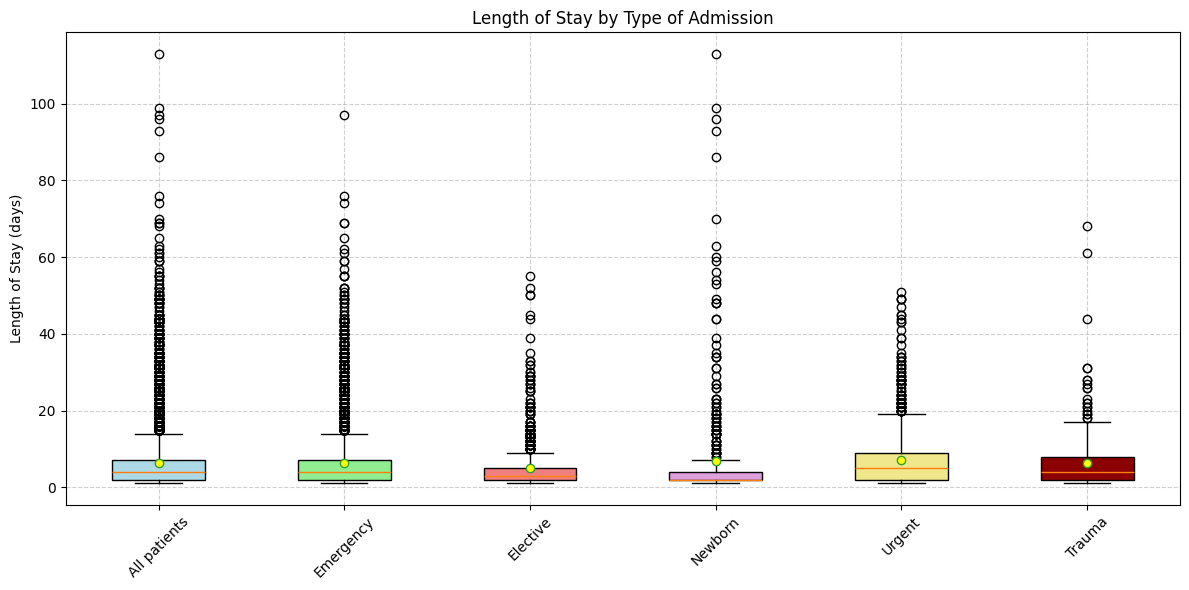

In [ ]:
#Type of Admission and Length of Stay Descriptive Stats

#Summary
admit_types = ['All patients', 'Emergency', 'Elective', 'Newborn' ,'Urgent', 'Trauma']
for admit_type in admit_types:
    if admit_type == "All patients":
        all_df = df
    else:
        all_df = df[df['Type_of_Admission'].str.contains(admit_type, case=False)]
    print(f"\n{admit_type}:")
    print("Mean LOS:", all_df['Length_of_Stay'].mean())
    print("Median LOS:", all_df['Length_of_Stay'].median())
    print("Std Dev LOS:", all_df['Length_of_Stay'].std())
    print("90th Percentile LOS:", all_df['Length_of_Stay'].quantile(0.9))
    print("Max LOS:", all_df['Length_of_Stay'].max())


#Boxplot
# Collect LOS data for each admission type
los_data = []
labels = []
colors = ['lightblue', 'lightgreen', 'lightcoral', 'plum', 'khaki', 'Darkred']

for admit_type in admit_types:
    if admit_type == "All patients":
        subset_df = df
    else:
        subset_df = df[df['Type_of_Admission'].str.contains(admit_type, case=False)]

    los_data.append(subset_df['Length_of_Stay'].dropna())
    labels.append(admit_type)

# Create boxplot
fig, ax = plt.subplots(figsize=(12, 6))
box = ax.boxplot(los_data, labels=labels, patch_artist=True, showmeans=True)

# Apply custom colors
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Customize mean marker
for mean in box['means']:
    mean.set_marker('o')
    mean.set_color('black')
    mean.set_markerfacecolor('yellow')

# Add grid and labels
ax.set_title('Length of Stay by Type of Admission')
ax.set_ylabel('Length of Stay (days)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


***Key Findings***  
There is significant variation by admission type
* Shortest stays: Elective (median 3 days, mean 4.9).
* Longest average stays: Urgent (mean 7.1, median 5).
* Most variable stays: Newborns, with low median (2 days) but some very long outliers (max 113, std dev 14.2).
* Emergency and Trauma: Very similar patterns (mean ~6.4, median 4, 90th percentile ~14)
* 60% of patients discharged within 3 days, while the 90th percentile reaches 8.0 days

*Statistical Significance*


In [ ]:
# Statistical Analysis
results = {}

# Reference dataframe columns
length_stay = df['Length_of_Stay']
total_costs = df['Total_Costs']
apr = df['APR_Severity_of_Illness_Code']
age = df['Age_Group']

print("Statistical Analyisis")

# Pearson: Length of Stay vs Total Costs
mask1 = length_stay.notnull()
if mask1.sum() > 1:
    corr1, pval1 = pearsonr(length_stay[mask1], total_costs[mask1])
else:
    corr1, pval1 = (np.nan, np.nan)
results['Length of Stay vs Total Costs'] = {
    'correlation': corr1,
    'p_value': pval1,
    'significant': pval1 < 0.05
}
print(f"Length of Stay vs Total Costs: correlation={corr1}, p_value={pval1}, significant={pval1 < 0.05}")

# Spearman: APR Severity of Illness Code vs Length of Stay
mask2 = length_stay.notnull()
if mask2.sum() > 1:
    corr2, pval2 = spearmanr(apr[mask2], length_stay[mask2])
else:
    corr2, pval2 = (np.nan, np.nan)
results['APR Severity of Illness Code vs Length of Stay'] = {
    'correlation': corr2,
    'p_value': pval2,
    'significant': pval2 < 0.05
}
print(f"APR Severity of Illness Code vs Length of Stay: correlation={corr2}, p_value={pval2}, significant={pval2 < 0.05}")

# Spearman: Age Group vs Length of Stay
mask3 = length_stay.notnull()
if mask3.sum() > 1:
    corr3, pval3 = spearmanr(age[mask3], length_stay[mask3])
else:
    corr3, pval3 = (np.nan, np.nan)
results['Age Group vs Length of Stay'] = {
    'correlation': corr3,
    'p_value': pval3,
    'significant': pval3 < 0.05
}
print(f"Age Group vs Length of Stay: correlation={corr3}, p_value={pval3}, significant={pval3 < 0.05}")

# Kruskal: Payment Typology 1 vs Length of Stay
groups4 = [length_stay[(df['Payment_Typology_1'] == val) & length_stay.notnull()]
           for val in df['Payment_Typology_1'].dropna().unique()]
if all(len(g) > 0 for g in groups4) and len(groups4) > 1:
    stat4, pval4 = kruskal(*groups4)
else:
    stat4, pval4 = (np.nan, np.nan)
results['Payment Typology 1 vs Length of Stay'] = {
    'statistic': stat4,
    'p_value': pval4,
    'significant': pval4 < 0.05
}
print(f"Payment Typology 1 vs Length of Stay: statistic={stat4}, p_value={pval4}, significant={pval4 < 0.05}")

# Kruskal: Type of Admission vs Length of Stay
groups5 = [length_stay[(df['Type_of_Admission'] == val) & length_stay.notnull()]
           for val in df['Type_of_Admission'].dropna().unique()]
if all(len(g) > 0 for g in groups5) and len(groups5) > 1:
    stat5, pval5 = kruskal(*groups5)
else:
    stat5, pval5 = (np.nan, np.nan)
results['Type of Admission vs Length of Stay'] = {'statistic': stat5, 'p_value': pval5, 'significant': pval5 < 0.05}
print(f"Type of Admission vs Length of Stay: statistic={stat5}, p_value={pval5}, significant={pval5 < 0.05}")


Statistical Analyisis
Length of Stay vs Total Costs: correlation=0.4584604920052621, p_value=0.0, significant=True
APR Severity of Illness Code vs Length of Stay: correlation=0.5174445701884817, p_value=0.0, significant=True
Age Group vs Length of Stay: correlation=0.2701896328457497, p_value=4.213766779704264e-130, significant=True
Payment Typology 1 vs Length of Stay: statistic=414.84373147982075, p_value=1.2489267234037436e-84, significant=True
Type of Admission vs Length of Stay: statistic=151.43354610070273, p_value=6.612263016319635e-31, significant=True


***Summary of Relationships with Length of Stay***
* Total Costs show a moderate positive correlation with LOS (r = 0.46), indicating that longer stays tend to incur higher costs. This relationship is statistically significant.

* Severity of Illness (APR Code) has the strongest correlation with LOS (r = 0.52), suggesting that sicker patients generally stay longer. Highly significant.

* Age Group has a weaker but still significant correlation with LOS (r = 0.27), implying older age groups may be associated with longer hospital stays.

* Payment Typology and Type of Admission both show statistically significant differences in LOS across categories, based on high test statistics and extremely low p-values.

***Correlation Matrix with HeatMap***

Correlation: Length of Stay vs Total Costs r = 0.4584604920052603
Correlation: Age Group vs Length of Stay r = 0.14490268668506526
Correlation: Gender vs Length of Stay = 0.050558132103030645
Correlation: Patient Disposition vs Length of Stay r = 0.2591061898861279
Correlation: Type of Admission vs Length of Stay r = 0.052103339170954686
Correlation: APR Severity of Illness vs Length of Stay r = -0.37602216152951384
Top 3 variables most correlated with Length of Stay:
Total_Costs                            0.458460
APR_Severity_of_Illness_Description    0.376022
Patient_Disposition                    0.259106
Name: Length_of_Stay, dtype: float64


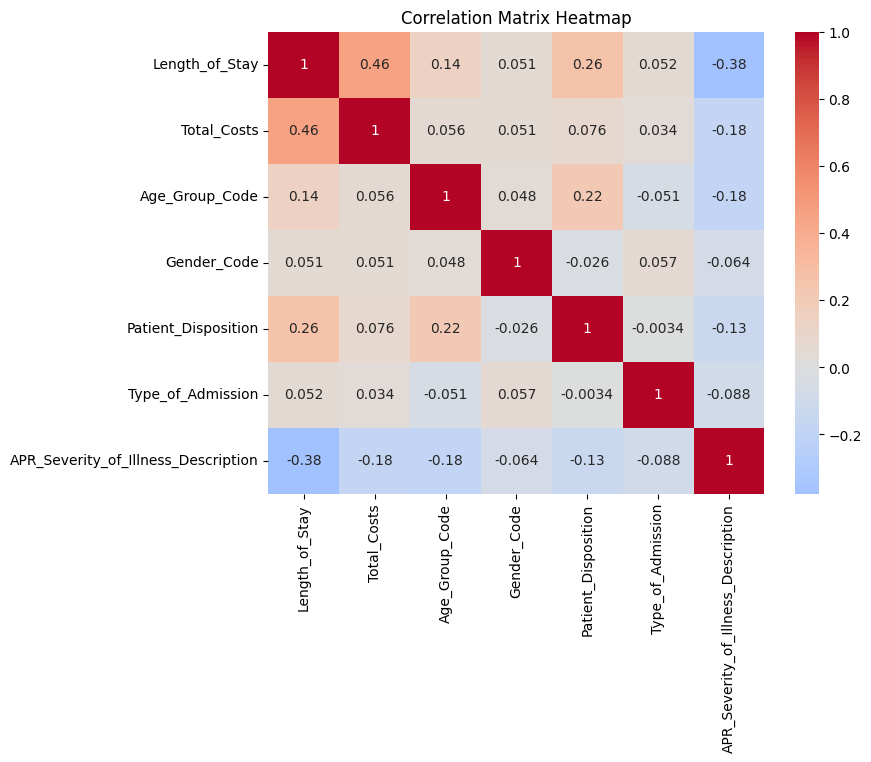

In [ ]:
# copy to not modify original df
df_copy = df.copy()

# Encode categorical variables
df_copy['Age_Group_Code'] = df_copy['Age_Group'].astype('category').cat.codes
df_copy['Gender_Code'] = df_copy['Gender'].astype('category').cat.codes

df_copy['Patient_Disposition'] = df_copy['Patient_Disposition'].astype('category').cat.codes

df_copy['Type_of_Admission'] = df_copy['Type_of_Admission'].astype('category').cat.codes

df_copy['APR_Severity_of_Illness_Description'] = df_copy['APR_Severity_of_Illness_Description'].astype('category').cat.codes

#relevant columns
df_corr = df_copy[[
    'Length_of_Stay',
    'Total_Costs',
    'Age_Group_Code',
    'Gender_Code',
    'Patient_Disposition',
    'Type_of_Admission',
    'APR_Severity_of_Illness_Description'
]]

# Compute correlation matrix
correlation_matrix = df_corr.corr(method='pearson')

# Print
print("Correlation: Length of Stay vs Total Costs r =", correlation_matrix.loc['Length_of_Stay', 'Total_Costs'])
print("Correlation: Age Group vs Length of Stay r =", correlation_matrix.loc['Age_Group_Code', 'Length_of_Stay'])
print("Correlation: Gender vs Length of Stay =", correlation_matrix.loc['Gender_Code', 'Length_of_Stay'])
print("Correlation: Patient Disposition vs Length of Stay r =", correlation_matrix.loc['Patient_Disposition', 'Length_of_Stay'])
print("Correlation: Type of Admission vs Length of Stay r =", correlation_matrix.loc['Type_of_Admission', 'Length_of_Stay'])
print("Correlation: APR Severity of Illness vs Length of Stay r =", correlation_matrix.loc['APR_Severity_of_Illness_Description', 'Length_of_Stay'])


#Top 3 strongest associations with LOS
# Drop LOS self-correlation and sort by absolute correlation
top_3 = (
    correlation_matrix['Length_of_Stay']
    .drop('Length_of_Stay')  # remove self-correlation
    .abs()                   # take absolute value
    .sort_values(ascending=False)[:3]  # get top 3
)
# results
print("Top 3 variables most correlated with Length of Stay:")
print(top_3)



#HEATMAP
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


***The Top 3 predictors***

\#1 Total_Costs (0.458)

\#2 APR_Severity (0.376)

\#1 Age_Group  (0.259)

***Correlation Insights: LOS***

* APR Severity of Illness (r = −0.376): Strong inverse correlation.

* Total Costs (r = 0.458): Strongest correlation with LOS, longer hospital stays tend to be more expensive.

* APR Severity of Illness  (r = -0.3767): Strong inverse correlation

* Age Group (r = 0.145): Mild positive correlation, older patients may have slightly longer stays.

* Patient Disposition (r = 0.259): moderate  positive correlation; require extended care tend to stay longer.

* Gender (r = 0.051): Very weak correlation; gender has minimal impact on LOS.

* Type of Admission (r = 0.052):Admission type has minimal impact on LOS; negligible correlation.

APR severity, age, and gender as significant predictors of LOS. However, the low R-squared suggests many other factors influence LOS that aren't.

In [ ]:
# Linear Regression: Length of Say

# copy to not modify original df
df_copy = df.copy()

#drop null rows(2) from earlier check
columns_to_check = ['Length_of_Stay']
df_copy = df_copy.dropna(subset=columns_to_check)

# categorical variables
df_copy['Age_Group_Code'] = df_copy['Age_Group'].astype('category').cat.codes
df_copy['Gender_Code'] = df_copy['Gender'].astype('category').cat.codes

df_copy['Patient_Disposition'] = df_copy['Patient_Disposition'].astype('category').cat.codes

df_copy['Type_of_Admission'] = df_copy['Type_of_Admission'].astype('category').cat.codes

df_copy['APR_Severity_of_Illness_Description'] = df_copy['APR_Severity_of_Illness_Description'] .astype('category').cat.codes

# predictors
X = df_copy[['Age_Group_Code', 'Gender_Code', 'Patient_Disposition', 'Type_of_Admission', 'APR_Severity_of_Illness_Description']]

# target
y = df_copy['Length_of_Stay']

# constant term
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

summary_text = model.summary().as_text()
cleaned_summary = "\n".join([line for line in summary_text.splitlines() if not line.strip().startswith("Date")])
print(cleaned_summary)


                            OLS Regression Results                            
Dep. Variable:         Length_of_Stay   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     361.9
Time:                        07:59:10   Log-Likelihood:                -26503.
No. Observations:                7772   AIC:                         5.302e+04
Df Residuals:                    7766   BIC:                         5.306e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   7.0959      0.311     22.853      0.000  

**Insight**: The model as a whole is statistically significant, meaning at least one predictor is related to Length of Stay

*   All selected predictors are statistically significant.
*    The model fit is moderate, many factors influencing Length of Stay are still unaccounted for.
*   Residuals are likely not normal and Length of Stay is typically skewed

 This model and the previous models highlight the typical limitations of regressions in healthcare data.

In [ ]:
# Statistical Analysis 2 chi tests
import scipy.stats as stats

pairs = [
    ('Length of Stay', 'Total Costs'),
    ('APR Severity of Illness Code', 'Length of Stay'),
    ("Type of Admission", 'Length of Stay'),  # Cate & numeric
    ('Payment Typology 1', 'Length of Stay')  # Cate & numeric
]

for var1, var2 in pairs:
    # Check dtypes: numeric or categorical
    numeric_types = [np.float64, np.int64]
    var1_is_num = df[var1].dtype in numeric_types
    var2_is_num = df[var2].dtype in numeric_types

    if var1_is_num and var2_is_num:
        # Both numeric: Pearson correlation
        corr, pval = stats.pearsonr(df[var1].dropna(), df[var2].dropna())
        print(f"{var1} vs {var2}: Pearson r={corr:.3f}, p={pval:.3g}")

    elif (var1_is_num and not var2_is_num) or (not var1_is_num and var2_is_num):
        # One numeric, one categorical: ANOVA (one-way)
        cat_var = var1 if not var1_is_num else var2
        num_var = var1 if var1_is_num else var2

        groups = [group[num_var].dropna().values for name, group in df.groupby(cat_var)]
        f_stat, p_val = stats.f_oneway(*groups)
        print(f"{cat_var} groups difference on {num_var}: F={f_stat:.3f}, p={p_val:.3g}")

    else:
        # Both categorical: Chi-squared test of independence
        contingency = pd.crosstab(df[var1], df[var2])
        chi2, p_val, dof, expected = stats.chi2_contingency(contingency)
        print(f"{var1} vs {var2}: Chi2={chi2:.3f}, p={p_val:.3g}")

Length of Stay vs Total Costs: Chi2=3998268.960, p=3.23e-213
Length of Stay groups difference on APR Severity of Illness Code: F=101.721, p=0
Type of Admission vs Length of Stay: Chi2=4443.319, p=0
Payment Typology 1 vs Length of Stay: Chi2=3471.521, p=1.23e-310


***Insight***

* Length of Stay vs Total Costs (Chi-square = 3,998,268.96, p = 3.23e-213) shows an extremely significant relationship
* Length of Stay groups differ significantly by APR Severity of Illness Code (F = 101.721, p = 0), consistent with clinical intuition that sicker patients stay longer.
* Type of Admission vs Length of Stay (Chi-square = 4,443.319, p = 0) and Payment Typology 1 vs Length of Stay (Chi-square = 3,471.521, p = 1.23e-310) both show very strong differences, meaning how a patient is admitted or how they pay is strongly linked to hospital stay duration.

# **Analysis Completed**

In [ ]:
# Convert to html
!jupyter nbconvert --to html /content/diabetes_readmission.ipynb

[NbConvertApp] Converting notebook /content/diabetes_readmission.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 20 image(s).
[NbConvertApp] Writing 1826828 bytes to /content/diabetes_readmission.html
